# Статистический анализ данных.

**Описание проекта**

Цель проекта: проанализировать данные сервиса аренды самокатов GoFast, проанализируйте данные и проверьте некоторые гипотезы, которые могут помочь бизнесу вырасти.

Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. Сервисом можно пользоваться:
- без подписки
   - абонентская плата отсутствует;
   - стоимость одной минуты поездки — 8 рублей;
   - стоимость старта (начала поездки) — 50 рублей;
- с подпиской Ultra
   - абонентская плата — 199 рублей в месяц;
   - стоимость одной минуты поездки — 6 рублей;
   - стоимость старта — бесплатно.
   
**Описание данных**

В основных данных есть информация о пользователях, их поездках и подписках.

**Пользователи** — *users_go.csv*
- user_id	уникальный идентификатор пользователя
- name	имя пользователя
- age	возраст
- city	город
- subscription_type	тип подписки (free, ultra)

**Поездки** — *rides_go.csv*
- user_id	уникальный идентификатор пользователя
- distance	расстояние, которое пользователь проехал в текущей сессии (в метрах)
- duration	продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку»
- date	дата совершения поездки

**Подписки** — *subscriptions_go.csv*
- subscription_type	тип подписки
- minute_price	стоимость одной минуты поездки по данной подписке
- start_ride_price	стоимость начала поездки
- subscription_fee	стоимость ежемесячного платежа


#### Шаг 1. Загрузка данных

- Загрузим данные из csv-файлов в датафреймы
- Изучим общую информацию о полученных датафреймах

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st

In [2]:
data_user = pd.read_csv('/datasets/users_go.csv')
data_rides = pd.read_csv('/datasets/rides_go.csv')
data_subscriptions = pd.read_csv('/datasets/subscriptions_go.csv')

In [3]:
def check_df(df):    
    display(df.info())   
    display(df.head())

In [4]:
check_df(data_user)
check_df(data_rides)
check_df(data_subscriptions)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


None

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


None

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


None

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


**Вывод**: из полученных данных видно, что названия колонок находятся в нужном регистре, исправлений не требуется. Тип данных соответствует, за исключением даты, тип данных необходимо поменять.

#### Шаг 2. Предобработка данных

2.1 Приведем столбец date к типу даты pandas.

In [5]:
data_rides['date'] = pd.to_datetime(data_rides['date'])

In [6]:
data_rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 564.8 KB


2.2 Создадим новый столбец с номером месяца на основе столбца date и дополнительно проверим за какой год предоставлены данные, чтобы убедиться, что они актуальные.

In [7]:
data_rides['month'] = data_rides['date'].dt.month
data_rides.head()

,user_id,distance,duration,date,month
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8


In [8]:
data_rides['Year'] = data_rides['date'].dt.year
data_rides['Year'].value_counts()

2021    18068
Name: Year, dtype: int64

2.3 Проверим наличие пропущенных значений и дубликатов в датафреймах.

In [9]:
data_user.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

In [10]:
data_rides.isna().sum()

user_id     0
distance    0
duration    0
date        0
month       0
Year        0
dtype: int64

In [11]:
data_subscriptions.isna().sum()

subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

Пропусков нет в таблицах.

In [12]:
data_user.duplicated().sum()

31

In [13]:
data_rides.duplicated().sum()

0

In [14]:
data_subscriptions.duplicated().sum()

0

Явные дубликаты нашлить в таблице *пользователи*, удалим их. 

In [15]:
data_user = data_user.drop_duplicates()
data_user.duplicated().sum()

0

**Вывод**: привели столбец date к типу даты pandas. Пропусков в данных нет. Были обнаружены и удалены дубликаты в таблице *пользователи*. 

#### Шаг 3. Исследовательский анализ данных

Опишем и визуализируем общую информацию о пользователях и поездках:

3.1 Частота встречаемости городов.

In [16]:
data_user['city'].value_counts()

Пятигорск         219
Екатеринбург      204
Ростов-на-Дону    198
Краснодар         193
Сочи              189
Омск              183
Тюмень            180
Москва            168
Name: city, dtype: int64

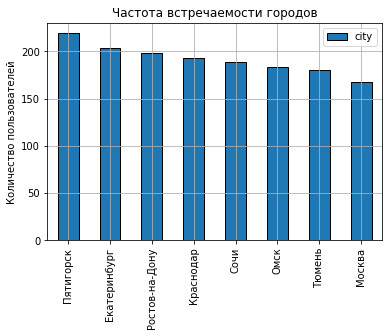

In [17]:
data_user['city'].value_counts().plot.bar(figsize=(6, 4), ec='black', legend=True, grid=True)
plt.title('Частота встречаемости городов')
plt.ylabel('Количество пользователей')
plt.show()

Чаще всего арендуют самокат в Пятигорске, реже всего в Москве.

3.2 Соотношение пользователей с подпиской и без подписки.

In [18]:
data_user['subscription_type'].value_counts()

free     835
ultra    699
Name: subscription_type, dtype: int64

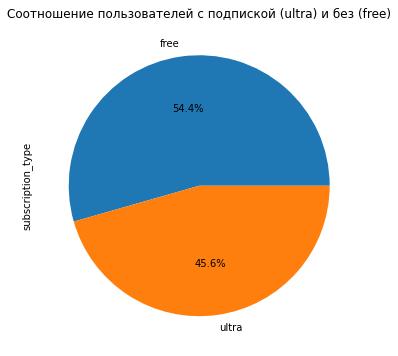

In [19]:
data_user['subscription_type'].value_counts().plot(
    kind ='pie', 
    autopct = '%1.1f%%', 
    figsize=(6,6))
plt.title('Соотношение пользователей с подпиской (ultra) и без (free)')
plt.show()

Больше пользователей без подписки.

3.3 Возраст пользователей.

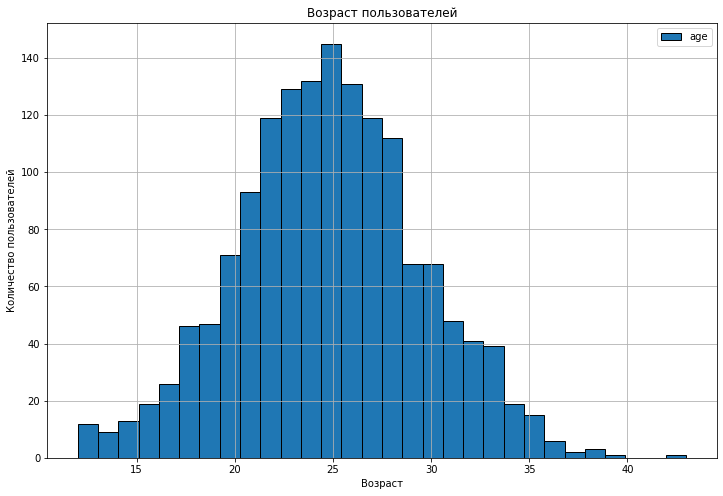

In [20]:
data_user['age'].hist(bins=30, figsize=(12,8), legend=True, ec='black')
plt.title('Возраст пользователей')
plt.xlabel('Возраст')
plt.ylabel('Количество пользователей')
plt.show()

Чаще всего арендой самоката пользуются люди в возрасте от 20 до 30 лет. Больше всего пользователей в возрасте 25 лет.

3.4 Расстояние, которое пользователь преодолел за одну поездку.

In [21]:
data_rides['distance'].describe()

count    18068.000000
mean      3070.659976
std       1116.831209
min          0.855683
25%       2543.226360
50%       3133.609994
75%       3776.222735
max       7211.007745
Name: distance, dtype: float64

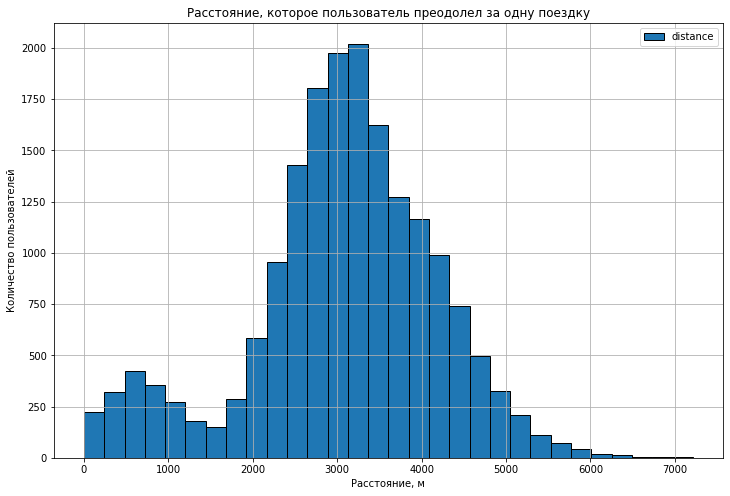

In [22]:
data_rides['distance'].hist(bins=30, figsize=(12,8), legend=True, ec='black')
plt.title('Расстояние, которое пользователь преодолел за одну поездку')
plt.xlabel('Расстояние, м')
plt.ylabel('Количество пользователей')
plt.show()

Самое большое расстояние за одну поездку составило больше 7 км, самое маленькое меньше метра, видимо пользователь передумал либо не понял, как управлять. Чаще всего пользователи проезжают на самокате за одну поездку около 3,1 км. Также есть пик до 1 км, возможно пользователи впервые попробовали использовать самокат и им не понравилось, либо самокат оказался неисправлен/разрядился, либо использовали самокат, чтобы быстрее добраться от остановки общественного транспорта до торгового/бизнес центра или кафе.


3.5 Продолжительность поездок.

In [23]:
data_rides['duration'].describe()

count    18068.000000
mean        17.805011
std          6.091051
min          0.500000
25%         13.597563
50%         17.678395
75%         21.724800
max         40.823963
Name: duration, dtype: float64

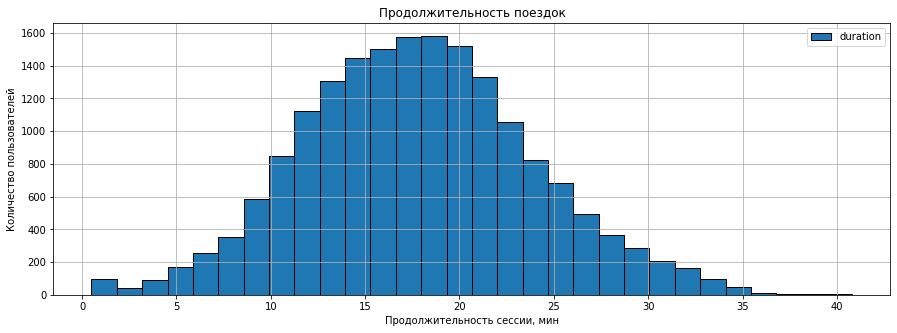

In [24]:
data_rides['duration'].hist(bins=30, figsize=(15,5), legend=True, ec='black')
plt.title('Продолжительность поездок')
plt.xlabel('Продолжительность сессии, мин')
plt.ylabel('Количество пользователей')
plt.show()

Чаще всего пользователи арендуют самокат приблизительно на время от 10 до 25 минут. Большая часть пользователей катаются чуть около 17 минут. Самая долгая поездка составила 40 минут, самая короткая меньше минуты, видимо, пользователь передумал.

**Вывод**: Чаще всего арендуют самокат в Пятигорске, реже всего в Москве, но в общем во всех городах самокаты пользуются популярностью примерно одинаково. Больше пользователей предпочитают не подписываться, но разница с пользователями, кто имеет подписку, не большая, всего 8,8%. Чаще всего арендой самоката пользуются люди в возрасте от 20 до 30 лет. В среднем продолжительность поездок составляет около 17 мин и расстояние около 3 км.

#### Шаг 4. Объединение данных

4.1 Объединим данные о пользователях, поездках и подписках в один датафрейм. Для этого воспользуемся методом merge(). После проверим количество строк в объединенном датафрейме.

In [25]:
data_complete = data_user.merge(data_rides, on='user_id').merge(data_subscriptions, on='subscription_type')
data_complete.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month,Year,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,2021,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,2021,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,2021,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,2021,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,2021,6,0,199


In [26]:
display(data_user.shape)
display(data_rides.shape)
display(data_subscriptions.shape)
display(data_complete.shape)

(1534, 5)

(18068, 6)

(2, 4)

(18068, 13)

Количество строк до и после объединения одинаковое, значит данные трех датафреймов соединились правильно.


4.2 Создадим ещё два датафрейма из датафрейма, созданного на этапе 4.1:
- c данными о пользователях без подписки
- с данными о пользователях с подпиской

In [27]:
data_complete_free = data_complete.query("subscription_type == 'free'")
data_complete_free['subscription_type'].value_counts()

free    11568
Name: subscription_type, dtype: int64

In [28]:
data_complete_ultra = data_complete.query("subscription_type == 'ultra'")
data_complete_ultra['subscription_type'].value_counts()

ultra    6500
Name: subscription_type, dtype: int64

Количество пользователей с тарифом free и ultra в новых датафреймах 11568 и 6500, что соответсвует общему количеству 18068.

4.3 Визуализируем информацию о расстоянии и времени поездок для пользователей обеих категорий.

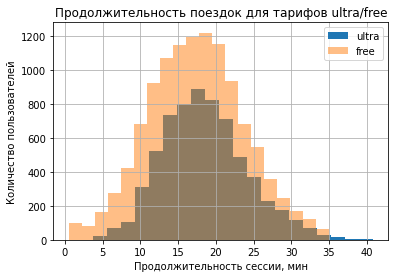

In [29]:
data_complete_ultra['duration'].hist(bins=20, label = 'ultra', alpha=1)
data_complete_free['duration'].hist(bins=20, label = 'free', alpha=0.5) 
plt.legend()
plt.title('Продолжительность поездок для тарифов ultra/free')
plt.xlabel('Продолжительность сессии, мин')
plt.ylabel('Количество пользователей')
plt.show()

Пик продолжительности сессии для тарифа free находится в диапазоне от 15 до 20 мин, в то время как для тарифа ultra пик приходится на 17,5 мин. 

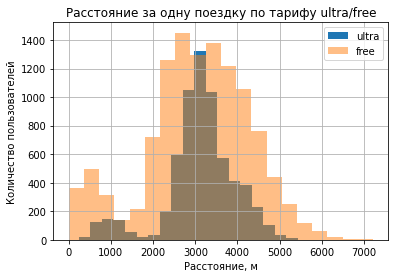

In [30]:
data_complete_ultra['distance'].hist(bins=20, label = 'ultra', alpha=1)
data_complete_free['distance'].hist(bins=20, label = 'free', alpha=0.5) 
plt.legend()
plt.title('Расстояние за одну поездку по тарифу ultra/free')
plt.xlabel('Расстояние, м')
plt.ylabel('Количество пользователей')
plt.show()

Пик расстояния, которое пользователь преодолел за одну поездку по тарифу free приходится на 2,8 км, в то время как для тарифа ultra 3,2 км. Также наблюдаем пик до и около 1 км у обоих тарифов, возможно пользователи впервые попробовали использовать самокат и им не понравилось( в случае тарифа free), либо самокат оказался неисправлен/разрядился, либо использовали самокат, чтобы быстрее добраться от остановки общественного транспорта до торгового/бизнес центра или кафе.

**Вывод** Исходя из графиков, можно сделать вывод, что среднее время поездки для обоих тарифов примерно одинаковое. При этом среднее расстояние, которое преодолевают пользователи по тарифу ultra, больше.

#### Шаг 5. Подсчёт выручки

5.1 Создадим датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными из шага 4: найдем суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц. Перед созданием датафрейма округлим продолжительность каждой поездки в большую сторону.

In [31]:
data_complete['duration'] = np.ceil(data_complete['duration'])

In [32]:
data_complete.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month,Year,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,26.0,2021-01-01,1,2021,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,16.0,2021-01-18,1,2021,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,7.0,2021-04-20,4,2021,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,19.0,2021-08-11,8,2021,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,27.0,2021-08-28,8,2021,6,0,199


In [33]:
comdined_data = data_complete.pivot_table(
    index=[
        'user_id', 'month'],
    values=[
        'distance', 'duration','name', 'subscription_type'], aggfunc={
        'distance':'sum', 'duration':'sum',
        'name':'count', 'subscription_type':'min'}
)
comdined_data.columns = ['total_distance', 'total_duration', 'total_trip', 'subscription_type']

In [34]:
comdined_data.head(10)

total_distance  total_duration  total_trip subscription_type
user_id month                                                              
1       1         7027.511294            42.0           2             ultra
        4          754.159807             7.0           1             ultra
        8         6723.470560            46.0           2             ultra
        10        5809.911100            32.0           2             ultra
        11        7003.499363            56.0           3             ultra
        12        6751.629942            28.0           2             ultra
2       3        10187.723006            63.0           3             ultra
        4         6164.381824            40.0           2             ultra
        6         3255.338202            14.0           1             ultra
        7         6780.722964            48.0           2             ultra

5.2 В этот же датафрейм добавим столбец с помесячной выручкой, которую принёс каждый пользователь. Для этого обратимся к информации об условиях оплаты для подписчиков и тех, у кого нет подписки. 

In [35]:
total_income = comdined_data.merge(
    data_subscriptions, on = 'subscription_type'
)
total_income['month'] = data_rides['date'].dt.month
total_income['total_duration'] = np.ceil(total_income['total_duration'])
total_income.head()

,total_distance,total_duration,total_trip,subscription_type,minute_price,start_ride_price,subscription_fee,month
0,7027.511294,42.0,2,ultra,6,0,199,1
1,754.159807,7.0,1,ultra,6,0,199,1
2,6723.470560,46.0,2,ultra,6,0,199,4
3,5809.911100,32.0,2,ultra,6,0,199,8
4,7003.499363,56.0,3,ultra,6,0,199,8


In [36]:
total_income['income'] = ((total_income[
    'start_ride_price']*total_income['total_trip'])
                          +(total_income['minute_price']
                            *total_income['total_duration'])
                          +total_income['subscription_fee']
                         )
total_income.head()

,total_distance,total_duration,total_trip,subscription_type,minute_price,start_ride_price,subscription_fee,month,income
0,7027.511294,42.0,2,ultra,6,0,199,1,451.0
1,754.159807,7.0,1,ultra,6,0,199,1,241.0
2,6723.470560,46.0,2,ultra,6,0,199,4,475.0
3,5809.911100,32.0,2,ultra,6,0,199,8,391.0
4,7003.499363,56.0,3,ultra,6,0,199,8,535.0


**Вывод**: нашли суммарное расстояние, количество поездок и суммарное время, а также выручку по месяцам.

#### Шаг 6. Проверка гипотез

Продакт-менеджеры сервиса хотят увеличить количество пользователей с подпиской. Для этого они будут проводить различные акции, но сначала нужно выяснить несколько важных моментов.

6.1 Важно понять, тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании. Проверим гипотезу. Используем исходные данные о продолжительности каждой сессии — отдельно для подписчиков и тех, у кого нет подписки:

- Нулевая гипотеза:пользователи с подпиской и без тратят одинаковое время на поездки
- Альтернативная гипотеза:пользователи с подпиской тратят больше времени на поездки, чем без подписки

In [37]:
sample_free = data_complete_free['duration']
sample_ultra = data_complete_ultra['duration']

alpha= 0.05

results = st.ttest_ind(
    sample_ultra,
    sample_free, alternative = 'greater')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 1.2804098316645618e-34
Отвергаем нулевую гипотезу


Пользователи с подпиской тратят больше времени на поездки, чем пользователи без подписки.

6.2 Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? Проверьте гипотезу:

- Нулевая гипотеза:среднее расстояние пользователей с подпиской за одну поездку составляет 3130 метров
- Альтернативная гипотеза:среднее расстояние пользователей с подпиской за одну поездку больше 3130 метров

In [38]:
interested_value = 3130

alpha = 0.05 

results = st.ttest_1samp(
    data_complete_ultra['distance'], 
    interested_value,
    alternative = 'greater')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.9195368847849785
Не получилось отвергнуть нулевую гипотезу


Cреднее расстояние, которое проезжают пользователи с подпиской, за одну поездку вероятнее всего составляет 3130 метров.


6.3 Проверим гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки:
- Нулевая гипотеза:помесячная выручка от пользователей с подпиской равно помесячной выручке от пользователей без подписки
- Альтернативная гипотеза:помесячная выручка от пользователей с подпиской выше, чем выручка от пользователей без подписки

In [39]:
income_ultra = total_income.loc[total_income['subscription_type'] == 'ultra', 'income']
income_free = total_income.loc[total_income['subscription_type'] == 'free', 'income']

sample_ultra = income_ultra
sample_free = income_free


alpha= 0.05

results = st.ttest_ind(
    sample_ultra,
    sample_free,
    alternative = 'greater')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 1.8850394384715216e-31
Отвергаем нулевую гипотезу


Помесячная выручка от пользователей с подпиской выше, чем выручка от пользователей без подписки.

6.4 Дана ситуация: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Необходимо понять, какую гипотезу можно использовать:

Необходимо провести сравнение выборок на предмет соответствия каждого пользователя.  Если уникальные значения пользователей в выборках совпадают, то мы имеет равные зависимые выборки. В таком случае для проверки гипотезы используется метод **scipy.stats.ttest_rel()** 
- Нулевая гипотеза будет выглядеть: μ1 = μ2
- Альтернативная будет выглядеть: μ1 != μ2 либо μ1 < μ2

μ1- средние значения количество обращений в техподдержку до изменения

μ2-средние значения количество обращений в техподдержку  после изменения

Массивы необходимо переданные в порядке - до изменения , затем - после изменения. Параметр alternative для случая μ1 != μ2 будет two-sided, который идет по умолчанию, и alternative = 'less' для случая μ1 < μ2.

**Вывод**

В полученных данных все названия колонок находились в нужном регистре, исправлений не требовалось. Тип данных соответствал, за исключением даты.

**Предобработка данных:**

- привели столбец date к типу даты pandas
- пропусков не обнаружили
- были обнаружены и удалены дубликаты в таблице *пользователи*

**Исследовательский анализ данных:**

Описали и визуализировали общую информацию о пользователях и поездках, в результате получили следующие данные:

- чаще всего арендуют самокат в Пятигорске, реже всего в Москве
- большая часть пользователей не имею подписки, тариф free
- чаще всего арендой самоката пользуются люди в возрасте от 20 до 30 лет. Больше всего пользователей в возрасте 25 лет
- самое большое расстояние за одну поездку составило больше 7 км, самое маленькое меньше метра
- чаще всего пользователи проезжают на самокате за одну поездку около 3,1 км
- чаще всего пользователи арендуют самокат приблизительно на время от 10 до 25 минут. Большая часть пользователей катаются чуть около 17 минут. Самая долгая поездка составила 40 минут, самая короткая меньше минуты, видимо, пользователь передумал

**Объединение данных:**

- объединили данные о пользователях, поездках и подписках в один датафрейм
- создали ещё два датафрейма : c данными о пользователях без подписки и с данными о пользователях с подпиской
- визуализировали информацию о расстоянии и времени поездок для пользователей обеих категорий. Выяснили, что пик продолжительности сессии для тарифа free находится в диапазоне от 15 до 20 мин, в то время как для тарифа ultra пик приходится на 17,5 мин. Пик расстояния, которое пользователь преодолел за одну поездку по тарифу free приходится на 2,8 км, в то время как для тарифа ultra 3,2 км.
- исходя из графиков, сделали вывод, что среднее время поездки для обоих тарифов примерно одинаковое. При этом среднее расстояние, которое преодолевают пользователи по тарифу ultra, больше

**Подсчёт выручки:**

- создали датафрейм со следующими данными: суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц
- в этот же датафрейм добавили столбец с помесячной выручкой, которую принёс каждый пользователь
- нашли суммарное расстояние, количество поездок и суммарное время, а также выручку по месяцам


**Проверка гипотез:**

Выяснили: 

- пользователи с подпиской тратят больше времени на поездки, чем пользователи без подписки
- среднее расстояние, которое проезжают пользователи с подпиской, за одну поездку вероятнее всего составляет 3130 метров
- помесячная выручка от пользователей с подпиской выше, чем выручка от пользователей без подписки